# Comparing ML models (Figure 2)

ANOVA F-statistic: 126.27665060350255
ANOVA p-value: 4.982301628979738e-171


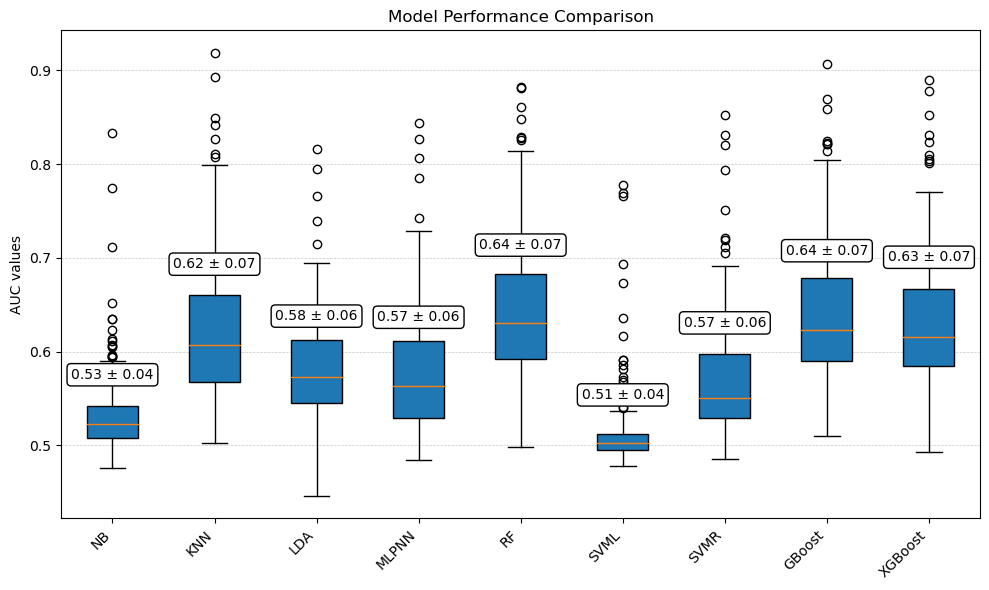

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  

model_accuracies_df = pd.read_csv('Multiple_Model_Accuracies_Root_with_XGB_33_11_30_22.csv')
model_accuracies_df = model_accuracies_df.select_dtypes(include=[np.number])
sample_data = {model: model_accuracies_df[model].dropna().tolist() for model in model_accuracies_df.columns}
means = {key: np.mean(value) for key, value in sample_data.items()}
std_devs = {key: np.std(value) for key, value in sample_data.items()}
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each model
bp = ax.boxplot(sample_data.values(), patch_artist=True)
for i, (key, value) in enumerate(sample_data.items()):
    ax.text(i + 1, means[key] + std_devs[key], f'{means[key]:.2f} ± {std_devs[key]:.2f}', 
            ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

ax.set_xticks(range(1, len(sample_data) + 1))
ax.set_xticklabels(sample_data.keys(), rotation=45, ha="right")
ax.set_ylabel('AUC values')
ax.set_title('Model Performance Comparison')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*sample_data.values())

# Output the ANOVA results
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

jpg_path = 'Fig_2_ML_Models_Boxplot.jpg'
plt.savefig(jpg_path, format='jpg', dpi=600)

# Display the plot
plt.tight_layout()
plt.show()

# Single Cell vs Bulk RNASeq data (Figure 3)

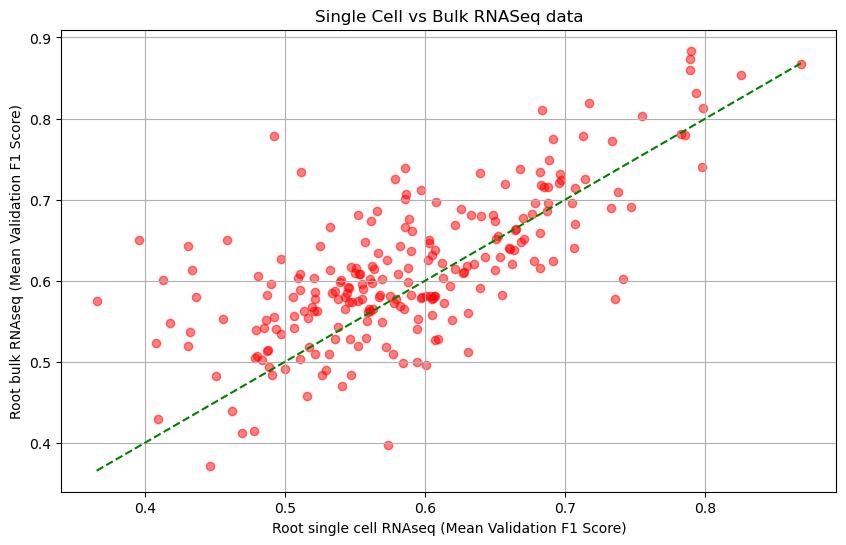

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('03Feb2023_Bulk_results_df.csv')
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']
plt.figure(figsize=(10, 6))
plt.scatter(root33_f1, bulk_f1, alpha=0.5, color='red', marker='o')
plt.plot([min(root33_f1), max(root33_f1)], [min(root33_f1), max(root33_f1)], linestyle='--', color='green')
plt.xlabel('Root single cell RNAseq (Mean Validation F1 Score)')
plt.ylabel('Root bulk RNAseq (Mean Validation F1 Score)')
plt.title('Single Cell vs Bulk RNASeq data')
plt.grid(True)

jpg_path = 'Fig_3_scVsBULK.jpg'
plt.savefig(jpg_path, format='jpg', dpi=600)

plt.show()

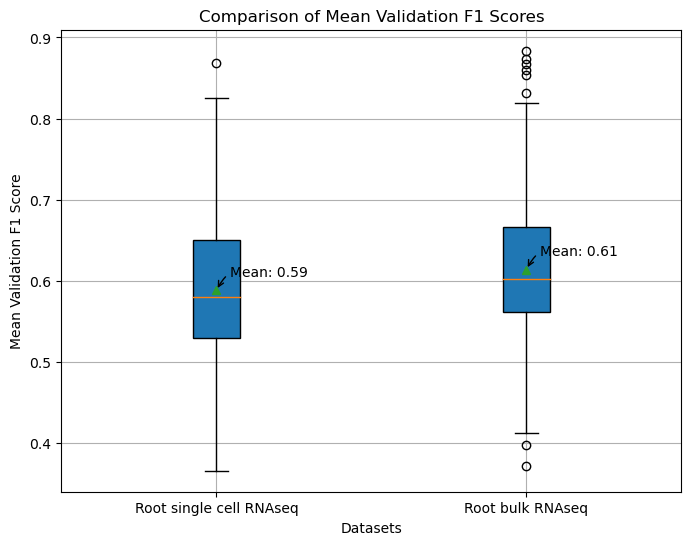

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Box Plot Comparison

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('03Feb2023_Bulk_results_df.csv')
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']
root33_mean = np.mean(root33_f1)
bulk_mean = np.mean(bulk_f1)
data = [root33_f1, bulk_f1]
labels = ['Root single cell RNAseq', 'Root bulk RNAseq']
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, vert=True, patch_artist=True, showmeans=True)
plt.annotate(f'Mean: {root33_mean:.2f}', xy=(1, root33_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))
plt.annotate(f'Mean: {bulk_mean:.2f}', xy=(2, bulk_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

plt.xlabel('Datasets')
plt.ylabel('Mean Validation F1 Score')
plt.title('Comparison of Mean Validation F1 Scores')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
import pandas as pd

# GO Terms that performed well in scRNA in the decreasing order of improvement

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('03Feb2023_Bulk_results_df.csv')
go_terms = root33_df['Unnamed: 0']
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']
improvement = root33_f1 - bulk_f1

improvement_df = pd.DataFrame({'GO Term': go_terms, 'Improvement': improvement})
improved_go_terms = improvement_df[improvement_df['Improvement'] > 0]

# Sort the GO terms by decreasing improvement
sorted_improved_go_terms = improved_go_terms.sort_values(by='Improvement', ascending=False)
sorted_go_terms = sorted_improved_go_terms['GO Term'].tolist()
for go_term in sorted_go_terms:
    print(go_term)

GO:0034220
GO:0006413
GO:0051082
GO:0000978
GO:0004842
GO:0009705
GO:0048364
GO:0006351
GO:0000981
GO:0071704
GO:0050790
GO:0008152
GO:0031969
GO:0043231
GO:0042802
GO:0018105
GO:0005654
GO:0009408
GO:0046983
GO:0030246
GO:0005802
GO:0009058
GO:0040008
GO:0005768
GO:0031225
GO:0016746
GO:0007049
GO:0045087
GO:0006952
GO:0005681
GO:0008236
GO:0005576
GO:0010468
GO:0016853
GO:0030154
GO:0006457
GO:0004857
GO:0009734
GO:0009579
GO:0003924
GO:0005789
GO:0005575
GO:0009506
GO:0005886
GO:0005737
GO:0015031
GO:0043086
GO:0015979
GO:0032259
GO:0009751
GO:0009733
GO:0000139
GO:0005829
GO:0008168
GO:0009414
GO:0016757
GO:0008150
GO:0005743
GO:0009737
GO:0061630
GO:0046658
GO:0003779
GO:0003676
GO:0050832
GO:0004721
GO:0008270
GO:0046982
GO:0009617
GO:0007165
GO:0006486
GO:0008652
GO:0016021
GO:0003824
GO:0004601
GO:0010150
GO:0042803
GO:0020037
GO:0006364
GO:0048366
GO:0019843
GO:0005516
GO:0005794
GO:0005874
GO:0022627
GO:0009534


# Root vs Shoot

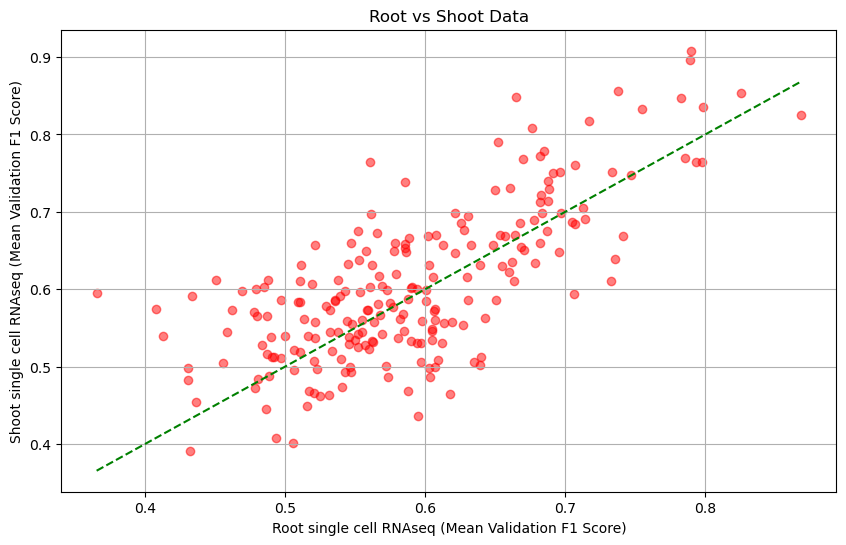

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
shoot_df = pd.read_csv('25Jan2023_shoot_results_df.csv')
root33_df.rename(columns={root33_df.columns[0]: 'GO'}, inplace=True)
shoot_df.rename(columns={shoot_df.columns[0]: 'GO'}, inplace=True)
matched_df = pd.merge(root33_df, shoot_df, on='GO', suffixes=('_Root33', '_Shoot'))
root33_f1 = matched_df['Mean Validation F1 Score_Root33']
shoot_f1 = matched_df['Mean Validation F1 Score_Shoot']
plt.figure(figsize=(10, 6))
plt.scatter(root33_f1, shoot_f1, alpha=0.5, color='red', marker='o')
plt.plot([min(root33_f1), max(root33_f1)], [min(root33_f1), max(root33_f1)], linestyle='--', color='green')

plt.xlabel('Root single cell RNAseq (Mean Validation F1 Score)')
plt.ylabel('Shoot single cell RNAseq (Mean Validation F1 Score)')
plt.title('Root vs Shoot Data')
plt.grid(True)

jpg_path = 'Fig_4_RootVsShoot.jpg'
plt.savefig(jpg_path, format='jpg', dpi=600)

plt.show()

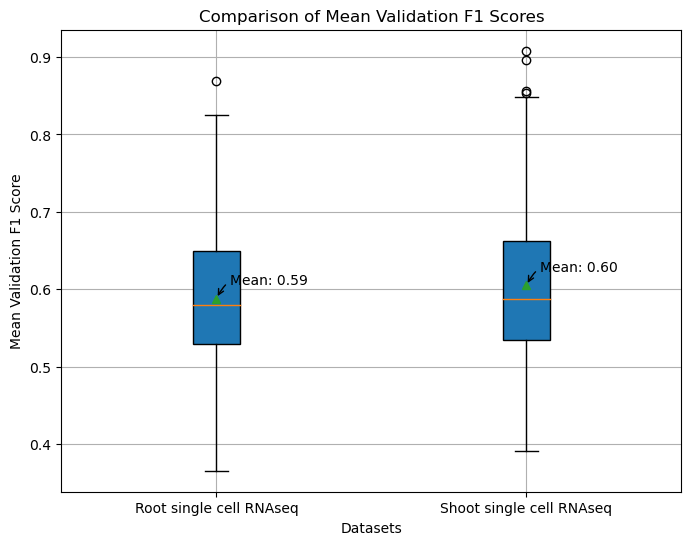

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('25Jan2023_shoot_results_df.csv')
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']
root33_mean = np.mean(root33_f1)
bulk_mean = np.mean(bulk_f1)
data = [root33_f1, bulk_f1]
labels = ['Root single cell RNAseq', 'Shoot single cell RNAseq']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, vert=True, patch_artist=True, showmeans=True)
plt.annotate(f'Mean: {root33_mean:.2f}', xy=(1, root33_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))
plt.annotate(f'Mean: {bulk_mean:.2f}', xy=(2, bulk_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

plt.xlabel('Datasets')
plt.ylabel('Mean Validation F1 Score')
plt.title('Comparison of Mean Validation F1 Scores')
plt.grid(True)
plt.show()

# Fig 4: The effect of DAPSeq

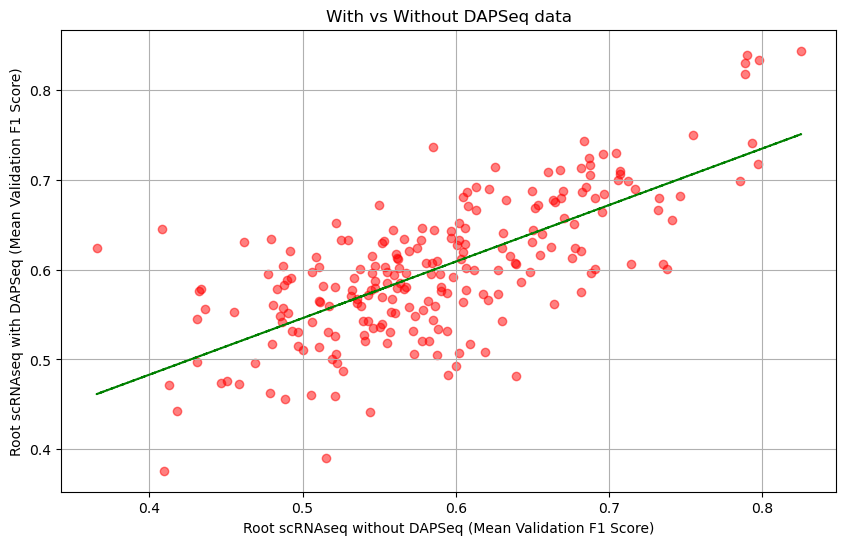

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
dapSeq = pd.read_csv('22Jan2024_DAPSeq0.5_Root33_results_df.csv')

root33_df.rename(columns={root33_df.columns[0]: 'GO'}, inplace=True)
dapSeq.rename(columns={dapSeq.columns[0]: 'GO'}, inplace=True)

matched_df = pd.merge(root33_df, dapSeq, on='GO', suffixes=('_sc', '_DapSeq'))

root33_f1 = matched_df['Mean Validation F1 Score_sc']
dapSeq_f1 = matched_df['Mean Validation F1 Score_DapSeq']

z = np.polyfit(root33_f1, dapSeq_f1, 1)
p = np.poly1d(z)
plt.figure(figsize=(10, 6))
plt.scatter(root33_f1, dapSeq_f1, alpha=0.5, color='red', marker='o')
plt.plot(root33_f1, p(root33_f1), "g--")
plt.xlabel('Root scRNAseq without DAPSeq (Mean Validation F1 Score)')
plt.ylabel('Root scRNAseq with DAPSeq (Mean Validation F1 Score)')
plt.title('With vs Without DAPSeq data')
plt.grid(True)

pdf_path_complete_code = 'Fig4_DAPSeq.pdf'
plt.savefig(pdf_path_complete_code, format='pdf')

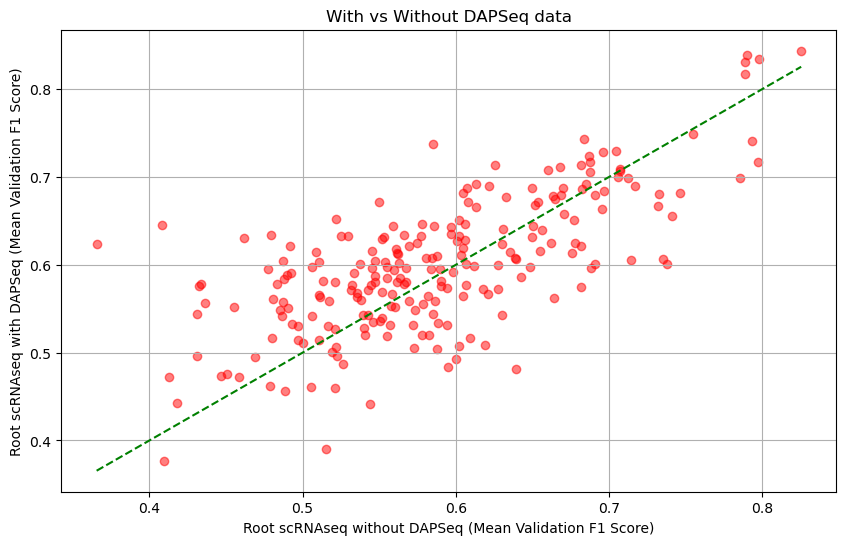

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
dapSeq = pd.read_csv('22Jan2024_DAPSeq0.5_Root33_results_df.csv')

root33_df.rename(columns={root33_df.columns[0]: 'GO'}, inplace=True)
dapSeq.rename(columns={dapSeq.columns[0]: 'GO'}, inplace=True)

matched_df = pd.merge(root33_df, dapSeq, on='GO', suffixes=('_sc', '_DapSeq'))

root33_f1 = matched_df['Mean Validation F1 Score_sc']
dapSeq_f1 = matched_df['Mean Validation F1 Score_DapSeq']

plt.figure(figsize=(10, 6))
plt.scatter(root33_f1, dapSeq_f1, alpha=0.5, color='red', marker='o')

# Add a diagonal line
plt.plot([min(root33_f1), max(root33_f1)], [min(root33_f1), max(root33_f1)], linestyle='--', color='green')

plt.xlabel('Root scRNAseq without DAPSeq (Mean Validation F1 Score)')
plt.ylabel('Root scRNAseq with DAPSeq (Mean Validation F1 Score)')
plt.title('With vs Without DAPSeq data')
plt.grid(True)

jpg_path = 'Fig_5_DAPseq.jpg'
plt.savefig(jpg_path, format='jpg', dpi=600)

plt.show()

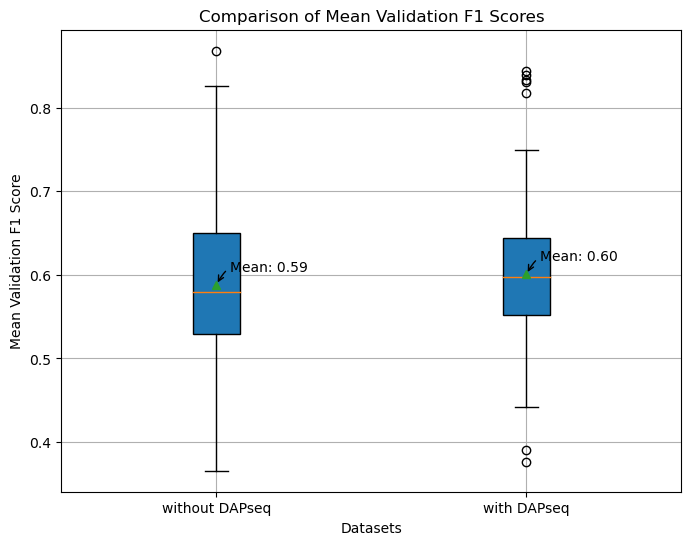

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV files
root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('22Jan2024_DAPSeq0.5_Root33_results_df.csv')

# Extract the F1 score data
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']

# Calculate the mean values
root33_mean = np.mean(root33_f1)
bulk_mean = np.mean(bulk_f1)

# Create a vertical box plot
data = [root33_f1, bulk_f1]
labels = ['without DAPseq', 'with DAPseq']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, vert=True, patch_artist=True, showmeans=True)

# Add mean value annotations
plt.annotate(f'Mean: {root33_mean:.2f}', xy=(1, root33_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))
plt.annotate(f'Mean: {bulk_mean:.2f}', xy=(2, bulk_mean), xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5"))

plt.xlabel('Datasets')
plt.ylabel('Mean Validation F1 Score')
plt.title('Comparison of Mean Validation F1 Scores')
plt.grid(True)

# # Save the plot as a PDF
# pdf_path_boxplot = 'MeanValidationF1Scores_Comparison.pdf'
# plt.savefig(pdf_path_boxplot, format='pdf')

# Show the plot
plt.show()

In [11]:
import pandas as pd

# Read the CSV files
root33_df = pd.read_csv('02Feb2023_Root33_results_df.csv')
bulk_df = pd.read_csv('22Jan2024_DAPSeq0.5_Root33_results_df.csv')

# Extract the GO terms and F1 scores
go_terms = root33_df['Unnamed: 0']
root33_f1 = root33_df['Mean Validation F1 Score']
bulk_f1 = bulk_df['Mean Validation F1 Score']

# Calculate the improvement in F1 score for each GO term
improvement = bulk_f1 - root33_f1 

# Create a DataFrame to store GO terms and their corresponding improvements
improvement_df = pd.DataFrame({'GO Term': go_terms, 'Improvement': improvement})

# Filter GO terms with positive improvement (higher F1 score in single-cell data)
improved_go_terms = improvement_df[improvement_df['Improvement'] > 0]

# Sort the GO terms by decreasing improvement
sorted_improved_go_terms = improved_go_terms.sort_values(by='Improvement', ascending=False)

# Extract the sorted GO terms
sorted_go_terms = sorted_improved_go_terms['GO Term'].tolist()

# Print the sorted GO terms
for go_term in sorted_go_terms:
    print(go_term)

GO:0012505
GO:0030154
GO:0006869
GO:0005975
GO:0022900
GO:0009860
GO:0016042
GO:0000287
GO:0006396
GO:0020037
GO:0006357
GO:0016829
GO:0005506
GO:0009555
GO:0008643
GO:0015297
GO:0009873
GO:0016616
GO:0005829
GO:0006511
GO:0003700
GO:0045892
GO:0042802
GO:0016874
GO:0003729
GO:0009416
GO:0009617
GO:0050660
GO:0030246
GO:0009753
GO:0017018
GO:0007165
GO:0004252
GO:0051301
GO:0005634
GO:0009751
GO:0008017
GO:0005789
GO:0006979
GO:0008289
GO:0006970
GO:0035556
GO:0004553
GO:0071704
GO:0005759
GO:0022857
GO:0006508
GO:0006468
GO:0005525
GO:0010150
GO:0050896
GO:0009734
GO:0004674
GO:0042803
GO:0051213
GO:0032259
GO:0040008
GO:0000398
GO:0046872
GO:0008234
GO:0009908
GO:0006952
GO:0048046
GO:0016021
GO:0005737
GO:0046983
GO:0090305
GO:0009651
GO:0006397
GO:0016567
GO:0009058
GO:0005783
GO:0006633
GO:0019843
GO:0004672
GO:0016746
GO:0005509
GO:0005777
GO:0006355
GO:0005615
GO:0004601
GO:0006631
GO:0009738
GO:0016705
GO:0004386
GO:0009409
GO:0043565
GO:0045893
GO:0008236
GO:0003674
GO:0005516

# Fig 5: Novel Predictions

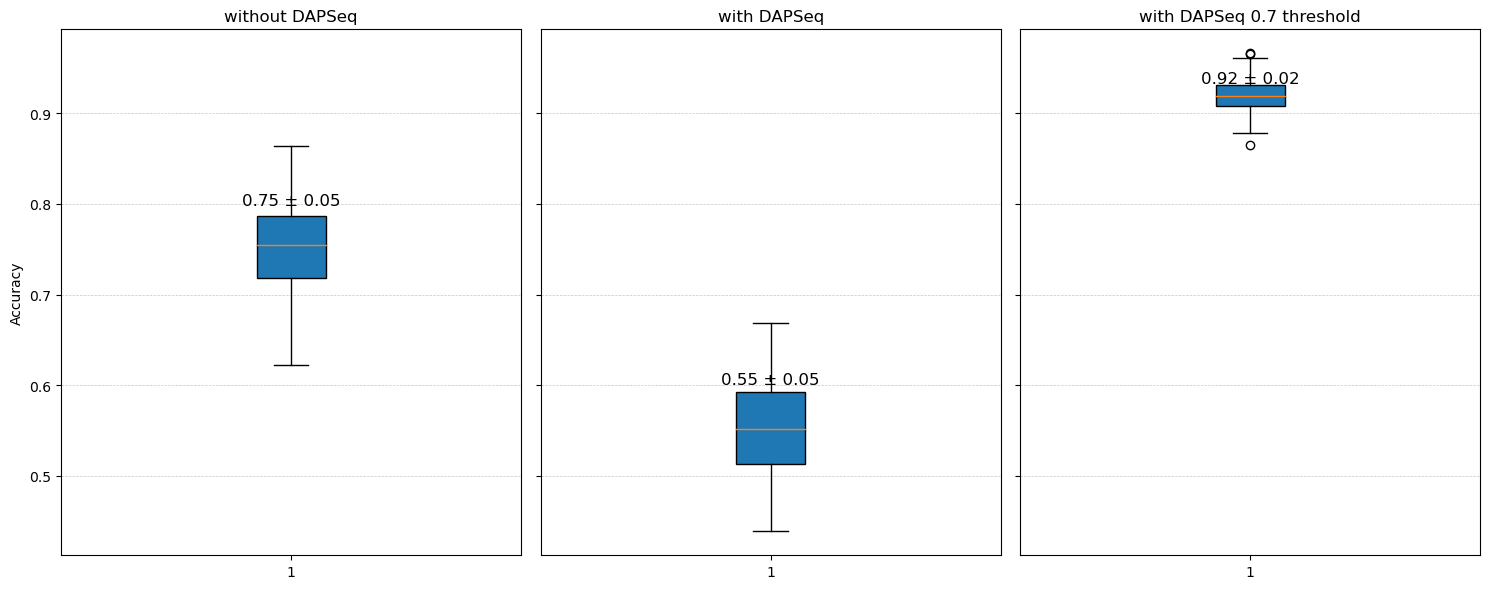

In [19]:
import matplotlib.pyplot as plt

# Sample data as a dictionary of lists
# Replace these with your actual lists
sample_data = {
    'without DAPSeq': without_dapseq_values,
    'with DAPSeq': with_dapseq_values,
    'with DAPSeq 0.7 threshold': [...]
}

# Calculate means and standard deviations for each list in the dictionary
means = {key: np.mean(value) for key, value in sample_data.items()}
std_devs = {key: np.std(value) for key, value in sample_data.items()}

# Create the box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

# Plotting each dataset
for i, (key, values) in enumerate(sample_data.items()):
    axes[i].boxplot(values, patch_artist=True)
    axes[i].set_title(key)
    # Adding text for mean and standard deviation
    axes[i].text(1, means[key] + std_devs[key], f'{means[key]:.2f} ± {std_devs[key]:.2f}', ha='center', va='center', fontsize=12)

# Grid and other settings
for ax in axes:
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.xaxis.grid(False)

# Set y-axis label
axes[0].set_ylabel('Accuracy')

# Display the plot
plt.tight_layout()
plt.show()

In [26]:
with_dapseq_values = pd.read_csv('12Dec2023_DAPSeq_Root33_results_df.csv')['Mean Validation Accuracy']
without_dapseq_values = [72.05182072829132,
 55.98615791132337,
 63.0295566502463,
 70.11043566362714,
 70.4873949579832,
 64.1275389702409,
 56.68413696715583,
 56.08708357685565,
 58.3913891149022,
 66.32444726541837,
 56.70813117042475,
 67.6,
 67.45238095238096,
 60.71307220386974,
 71.67279552593273,
 71.44588596790713,
 83.45283573317663,
 70.2813852813853,
 60.08658008658008,
 60.76271186440678,
 61.70731707317072,
 48.89230769230769,
 66.82170542635659,
 63.1967213114754,
 62.192118226601,
 52.748868778280546,
 66.92307692307693,
 59.04486668438304,
 61.954751131221705,
 61.2260348583878,
 59.772727272727266,
 57.47863247863248,
 56.30601092896173,
 58.27364185110664,
 67.51012145748987,
 58.4288824383164,
 57.79500137571665,
 63.489795918367356,
 56.88981288981289,
 60.03327283726557,
 61.056361375880655,
 62.50709787791649,
 54.30252100840336,
 60.02254372379405,
 69.73949579831934,
 68.07692307692308,
 70.60606060606062,
 77.88319856244385,
 61.02205721773313,
 64.33650793650794,
 70.14009661835749,
 63.876811594202884,
 73.31612162937463,
 63.35220125786163,
 67.61904761904762,
 60.74327122153209,
 62.530751626975615,
 65.00264503614883,
 69.88215924226728,
 76.35714285714286,
 66.9054436930981,
 82.47191011235954,
 67.02009518773136,
 66.89922480620154,
 59.07956937860843,
 57.327586206896555,
 78.88095238095238,
 70.34107402031931,
 70.67948717948718,
 58.17028985507247,
 57.582245989304816,
 56.17236662106703,
 76.77310924369748,
 74.6923076923077,
 78.91374663072777,
 66.90217391304347,
 73.62698412698411,
 61.717445271947625,
 62.89682539682539,
 53.43631014191761,
 58.126566416040106,
 57.993836915297095,
 61.139112903225815,
 59.90769230769231,
 55.375,
 72.56521739130434,
 56.99570815450643,
 60.48029556650245,
 69.86786469344611,
 65.53539019963702,
 66.38535995160314,
 58.17438271604939,
 62.0,
 66.33689839572192,
 66.29965559511996,
 51.263157894736835,
 62.59893455098935,
 59.35897435897435,
 53.300970873786405,
 56.46984126984128,
 53.66477272727273,
 72.95731707317074,
 59.75783475783476,
 76.4616935483871,
 62.251082251082245,
 68.54761904761905,
 61.61298076923076,
 64.0909090909091,
 58.18253968253969,
 79.42028985507245,
 66.48401826484019,
 65.38423339540658,
 67.02753315112867,
 67.66666666666666,
 68.51063829787233,
 65.16526610644257,
 66.06087470449172,
 52.473404255319146,
 70.46710889994472,
 67.2962962962963,
 66.41025641025642,
 54.50000000000001,
 62.931531531531526,
 67.83783783783784,
 69.17378917378917,
 58.10344827586207,
 54.28163265306123,
 57.236842105263165,
 58.49365750528541,
 61.32411067193676,
 63.92857142857144,
 61.33100233100234,
 52.784615384615385,
 59.05405405405405,
 59.202898550724626,
 68.26781326781328,
 75.52380952380953,
 62.35930735930735,
 56.7391304347826,
 55.03565062388592,
 56.54022988505747,
 69.52,
 53.13445378151261,
 68.73440285204991,
 59.34631432545202,
 57.94660515522312,
 55.91856060606061,
 73.05052790346909,
 59.327558086682174,
 57.3937862623994,
 58.57142857142856,
 59.14576864899291,
 61.023809523809526,
 66.41077441077441,
 56.0751879699248,
 52.76018099547512,
 62.25225225225226,
 63.59683794466403,
 53.37893101050996,
 57.56989247311828,
 51.73333333333334,
 57.1911421911422,
 60.58823529411765,
 52.882653061224495,
 64.59591041869523,
 63.99999999999999,
 81.40692640692642,
 64.15584415584415,
 88.01149425287356,
 86.35975609756098,
 87.28571428571428,
 58.5749619482496,
 62.36231884057971,
 54.665306122448975,
 61.785505552308585,
 62.35887096774194,
 65.3125,
 62.61150234741783,
 58.76984126984127,
 68.99999999999999,
 57.36781609195402,
 82.14285714285715,
 58.03030303030303,
 56.57253599114065,
 52.84057971014493,
 64.62462462462463,
 57.68245614035088,
 67.6218487394958,
 58.21322351864563,
 62.59057971014494,
 57.07792207792208,
 63.72435897435898,
 59.57837301587301,
 59.14285714285714,
 63.294117647058826,
 57.94117647058823,
 54.03232629788016,
 62.962962962962955,
 60.671641791044784,
 59.18776875298614,
 57.10526315789475,
 60.68333333333334,
 56.63793103448275,
 66.42682926829269,
 59.532710280373834,
 56.400000000000006,
 68.08300395256917,
 56.95767195767196,
 66.5604909409702,
 60.238095238095234,
 58.222684958353746,
 58.61635220125786,
 75.11081560283688,
 58.591049382716044,
 60.97780126849894,
 58.674242424242415,
 64.83957219251337,
 56.096737907761515,
 57.714285714285715,
 64.36758893280631]

# Figure 6: Variation Plot Bulk vs Single Cell 

In [6]:
bulk_data = pd.read_csv('data/bulk_go_matrix.csv')
bulk_data.columns = bulk_data.columns.str.replace('Unnamed: 0','GeneID')
bulk_data.index=bulk_data.iloc[:,0]
bulk_data.drop(columns=bulk_data.columns[0], axis=1, inplace=True)
bulk_data

,APL_1,APL_2,APL_3,CO2_1,CO2_2,CO2_3,COBL9_1,COBL9_2,COBL9_3,COR_1,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT4G04480,0.000,0.140,0.063,0.000,0.161,0.000,0.100,0.144,0.064,0.000,...,0,0,0,0,0,0,0,0,0,0
AT1G32928,8.623,3.913,6.110,4.464,4.502,5.347,5.435,2.822,6.573,5.315,...,1,0,0,0,0,0,0,0,0,0
AT1G07730,5.656,21.038,11.822,3.447,2.305,4.237,18.197,15.558,11.046,6.723,...,0,0,0,0,0,0,0,0,0,0
AT1G03340,0.000,0.136,0.093,0.259,0.078,0.198,0.000,0.141,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
AT1G04440,78.204,73.435,63.822,30.346,26.391,31.218,41.779,37.098,44.034,59.753,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT1G48210,45.737,48.669,30.645,2.156,6.021,7.530,12.861,10.448,14.077,7.997,...,0,0,0,0,0,0,0,0,0,0
AT4G13170,11.490,6.093,16.240,71.444,75.035,64.427,7.635,9.301,7.786,6.003,...,0,0,0,0,0,0,0,0,0,0
AT5G18320,0.000,0.000,0.000,0.000,0.000,0.025,0.043,0.313,0.110,0.000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
single_cell_33_data = pd.read_csv('data/clusters_33_go_matrix.txt')
single_cell_33_data.columns = single_cell_33_data.columns.str.replace('Unnamed: 0','GeneID')
single_cell_33_data.index=single_cell_33_data.iloc[:,0]
single_cell_33_data.drop(columns=single_cell_33_data.columns[0], axis=1, inplace=True)
single_cell_33_data

,1,2,3,4,5,6,7,8,9,10,...,GO:0071456,GO:0071555,GO:0071704,GO:0090305,GO:0090502,GO:0098869,GO:0099503,GO:0106310,GO:0110165,GO:1902600
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.235354,0.130453,1.088534,0.025614,0.276876,0.475183,0.590260,0.218156,0.606518,0.063581,...,0,0,0,0,0,0,0,0,0,0
AT1G01020,0.825579,0.410447,0.261396,0.152758,0.163924,0.272320,0.258516,0.457860,0.321913,0.371860,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0.001090,0.003155,0.015176,0.000867,0.275636,0.115203,0.008890,0.002562,0.055250,0.003478,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0.022025,0.023524,0.100888,0.008440,0.090527,0.108768,0.104148,0.046074,0.076399,0.018313,...,0,0,0,1,1,0,0,0,0,0
AT1G01050,0.958800,1.651358,2.126612,1.235073,1.609432,0.692831,3.054592,0.215002,0.714507,5.115776,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
ATCG01280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


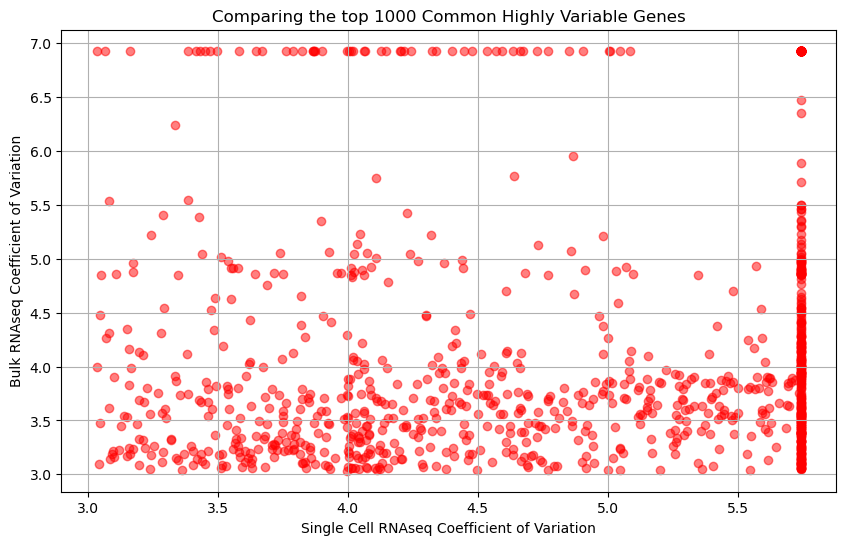

In [8]:
# Select the first 48 features of bulk_data and 33 features of single_cell_33_data
bulk_data_selected = bulk_data.iloc[:, :48]
single_cell_33_data_selected = single_cell_33_data.iloc[:, :33]
bulk_data_cv = bulk_data_selected.std(axis=1) / bulk_data_selected.mean(axis=1)
single_cell_33_data_cv = single_cell_33_data_selected.std(axis=1) / single_cell_33_data_selected.mean(axis=1)
combined_cv = pd.DataFrame({'bulk_cv': bulk_data_cv, 'single_cell_cv': single_cell_33_data_cv})
combined_cv = combined_cv.dropna()
combined_cv['min_cv'] = combined_cv[['bulk_cv', 'single_cell_cv']].min(axis=1)
top_common_genes = combined_cv.sort_values('min_cv', ascending=False).head(1000)
plt.figure(figsize=(10, 6))
plt.scatter( top_common_genes['single_cell_cv'], top_common_genes['bulk_cv'], alpha=0.5, color='red', marker='o')
plt.title('Comparing the top 1000 Common Highly Variable Genes')
plt.xlabel('Single Cell RNAseq Coefficient of Variation')
plt.ylabel('Bulk RNAseq Coefficient of Variation')
plt.grid(True)


pdf_path_complete_code = 'Fig6_VariationPlot.pdf'
plt.savefig(pdf_path_complete_code, format='pdf')

Number of data points with maximum CV: 7


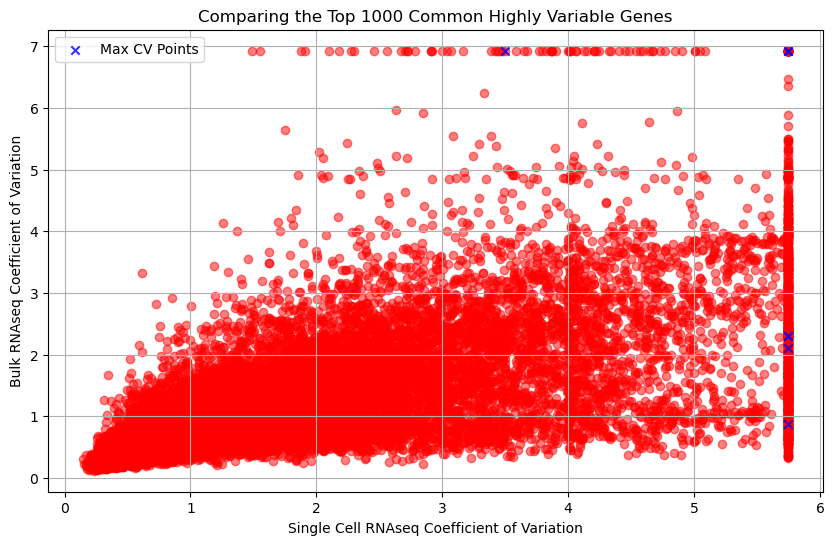

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'combined_cv' DataFrame

# Identify data points with maximum CV on X and Y axes
max_x_cv_points = combined_cv[combined_cv['single_cell_cv'] == combined_cv['single_cell_cv'].max()]
max_y_cv_points = combined_cv[combined_cv['bulk_cv'] == combined_cv['bulk_cv'].max()]

# Combine and deduplicate the points
max_cv_points = pd.concat([max_x_cv_points, max_y_cv_points]).drop_duplicates()

# Count occurrences
num_max_cv_points = len(max_cv_points)
print(f'Number of data points with maximum CV: {num_max_cv_points}')

# Plotting the scatter plot with marked points
plt.figure(figsize=(10, 6))
plt.scatter(combined_cv['single_cell_cv'], combined_cv['bulk_cv'], alpha=0.5, color='red', marker='o')
plt.scatter(max_cv_points['single_cell_cv'], max_cv_points['bulk_cv'], alpha=0.8, color='blue', marker='x', label='Max CV Points')
plt.title('Comparing the Top 1000 Common Highly Variable Genes')
plt.xlabel('Single Cell RNAseq Coefficient of Variation')
plt.ylabel('Bulk RNAseq Coefficient of Variation')
plt.legend()
plt.grid(True)

pdf_path_complete_code = 'Fig6_VariationPlot.pdf'
plt.savefig(pdf_path_complete_code, format='pdf')
plt.show()

Number of data points with maximum CV (until the second digit): 977


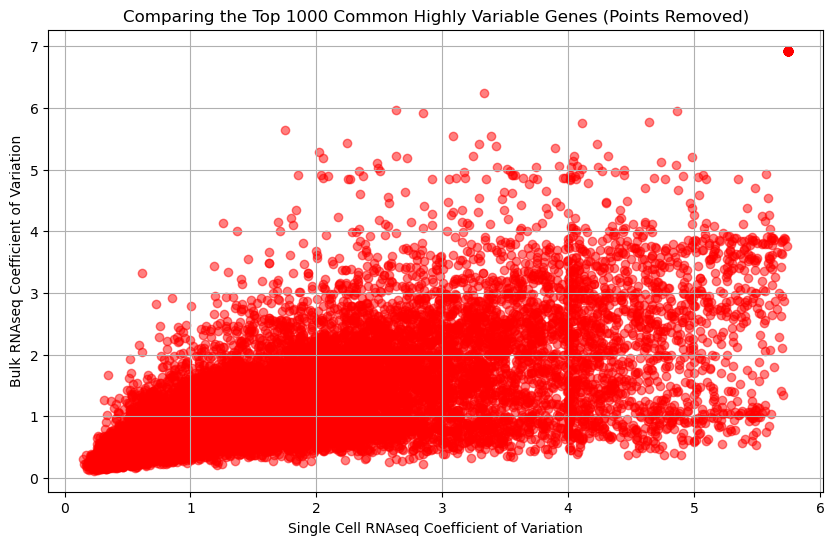

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'combined_cv' DataFrame

# Identify data points with maximum CV on X and Y axes (considering only the first two digits)
max_x_cv_points = combined_cv[combined_cv['single_cell_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['single_cell_cv'].max() * 100)]
max_y_cv_points = combined_cv[combined_cv['bulk_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['bulk_cv'].max() * 100)]

# Combine and deduplicate the points
max_cv_points = pd.concat([max_x_cv_points, max_y_cv_points]).drop_duplicates()

# Count occurrences
num_max_cv_points = len(max_cv_points)
print(f'Number of data points with maximum CV (until the second digit): {num_max_cv_points}')

# Remove identified points
filtered_cv_points = combined_cv[~combined_cv.index.isin(max_cv_points.index)]

# Plotting the scatter plot without the removed points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_cv_points['single_cell_cv'], filtered_cv_points['bulk_cv'], alpha=0.5, color='red', marker='o')
plt.title('Comparing the Top 1000 Common Highly Variable Genes (Points Removed)')
plt.xlabel('Single Cell RNAseq Coefficient of Variation')
plt.ylabel('Bulk RNAseq Coefficient of Variation')
plt.grid(True)

pdf_path_complete_code = 'Fig6_VariationPlot_Points_Removed.pdf'
plt.savefig(pdf_path_complete_code, format='pdf')
plt.show()

In [11]:
max_y_cv_points

,bulk_cv,single_cell_cv,min_cv
GeneID,,,
AT1G03890,6.928203,4.637604,4.637604
AT1G10585,6.928203,3.763882,3.763882
AT1G10652,6.928203,4.770489,4.770489
AT1G12665,6.928203,3.163298,3.163298
AT1G13650,6.928203,5.744563,5.744563
...,...,...,...
AT5G55856,6.928203,5.744563,5.744563
AT5G59305,6.928203,5.744563,5.744563
AT5G59310,6.928203,5.744563,5.744563


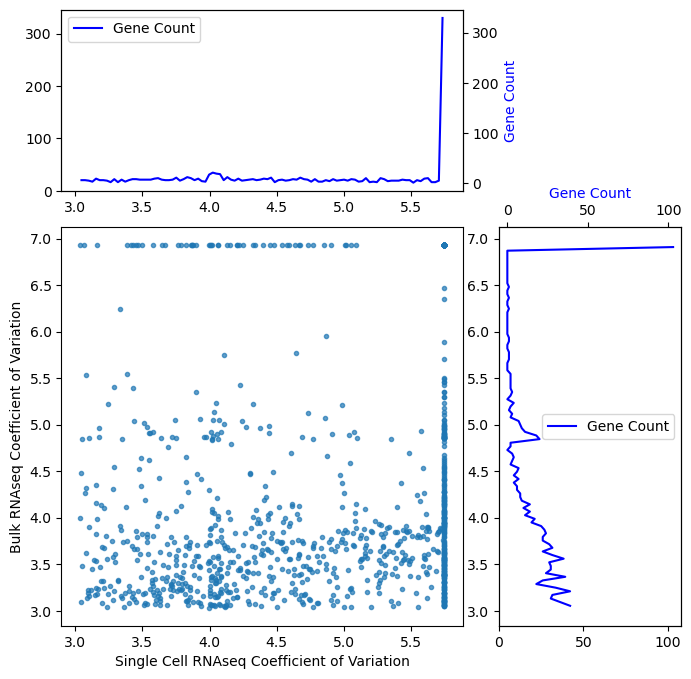

In [12]:
# Marginal Density Plot
# Plastid and Seaborn aren't working
# Plastid - unable to install, getting a build dependency error
# Seaborn - unable to create a scatterhist
# Using Gridspec to 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

bulk_data_selected = bulk_data.iloc[:, :48]
single_cell_33_data_selected = single_cell_33_data.iloc[:, :33]
bulk_data_cv = bulk_data_selected.std(axis=1) / bulk_data_selected.mean(axis=1)
single_cell_33_data_cv = single_cell_33_data_selected.std(axis=1) / single_cell_33_data_selected.mean(axis=1)
combined_cv = pd.DataFrame({'bulk_cv': bulk_data_cv, 'single_cell_cv': single_cell_33_data_cv})
combined_cv = combined_cv.dropna()
combined_cv['min_cv'] = combined_cv[['bulk_cv', 'single_cell_cv']].min(axis=1)
top_common_genes = combined_cv.sort_values('min_cv', ascending=False).head(1000)

# Assuming top_common_genes is your DataFrame
x = top_common_genes['single_cell_cv'].values
y = top_common_genes['bulk_cv'].values

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x, y, marker='.', alpha=0.7)
ax_main.set(xlabel="Single Cell RNAseq Coefficient of Variation", ylabel="Bulk RNAseq Coefficient of Variation")

line_color = 'blue'

# Plot line for x with count of genes
counts_x, edges_x, _ = ax_xDist.hist(x, bins=100, align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_x = 0.5 * (edges_x[:-1] + edges_x[1:])
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.plot(bin_centers_x, counts_x, color=line_color, label='Gene Count')

# Plot line for y with count of genes
counts_y, edges_y, _ = ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_y = 0.5 * (edges_y[:-1] + edges_y[1:])
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.plot(counts_y, bin_centers_y, color=line_color, label='Gene Count')

# Set labels for the twin axes
ax_xCumDist.set_ylabel('Gene Count', color=line_color)
ax_yCumDist.set_xlabel('Gene Count', color=line_color)

# Show legends
ax_xCumDist.legend()
ax_yCumDist.legend()

pdf_path_complete_code = 'Fig6_MarginalDensity.pdf'
plt.savefig(pdf_path_complete_code, format='pdf')

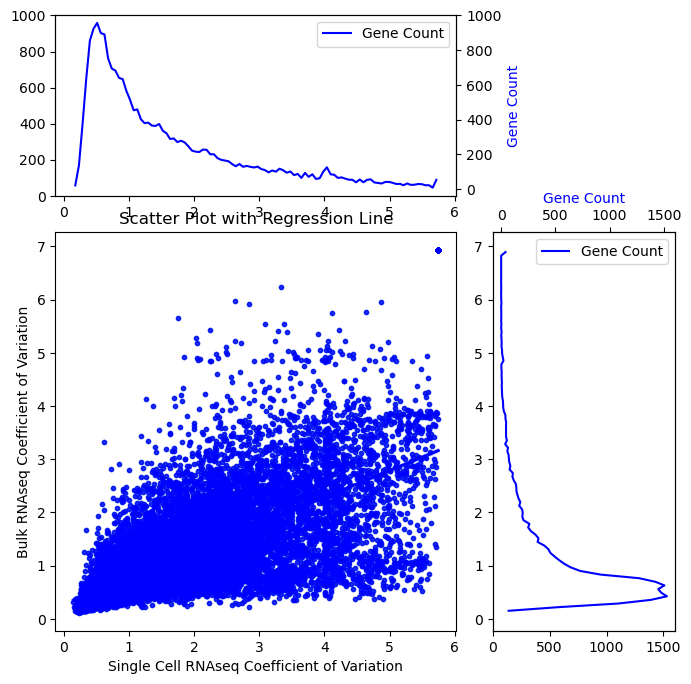

In [16]:
# UPDATED MARGINAL PLOT - Filtered the maximum values out

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Identify data points with maximum CV on X and Y axes (considering only the first two digits)
max_x_cv_points = combined_cv[combined_cv['single_cell_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['single_cell_cv'].max() * 100)]
max_y_cv_points = combined_cv[combined_cv['bulk_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['bulk_cv'].max() * 100)]

# Combine and deduplicate the points
max_cv_points = pd.concat([max_x_cv_points, max_y_cv_points]).drop_duplicates()

# Remove identified points
filtered_cv_points = combined_cv[~combined_cv.index.isin(max_cv_points.index)]

# Assuming filtered_cv_points is your DataFrame
x = filtered_cv_points['single_cell_cv'].values
y = filtered_cv_points['bulk_cv'].values

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x, y, marker='.', alpha=0.7)
ax_main.set(xlabel="Single Cell RNAseq Coefficient of Variation", ylabel="Bulk RNAseq Coefficient of Variation")

# Plot line for x with count of genes
counts_x, edges_x, _ = ax_xDist.hist(x, bins=100, align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_x = 0.5 * (edges_x[:-1] + edges_x[1:])
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.plot(bin_centers_x, counts_x, color=line_color, label='Gene Count')

# Plot line for y with count of genes
counts_y, edges_y, _ = ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_y = 0.5 * (edges_y[:-1] + edges_y[1:])
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.plot(counts_y, bin_centers_y, color=line_color, label='Gene Count')

# Set labels for the twin axes
ax_xCumDist.set_ylabel('Gene Count', color=line_color)
ax_yCumDist.set_xlabel('Gene Count', color=line_color)

# Show legends
ax_xCumDist.legend()
ax_yCumDist.legend()

# Set labels and title
ax_main.set(xlabel="Single Cell RNAseq Coefficient of Variation", ylabel="Bulk RNAseq Coefficient of Variation")
ax_main.set_title("Scatter Plot with Regression Line")

# Save as JPG with 600 DPI
jpg_path = 'Fig_6_VariationPlot.jpg'
# plt.savefig(jpg_path, format='jpg', dpi=600)

plt.show()

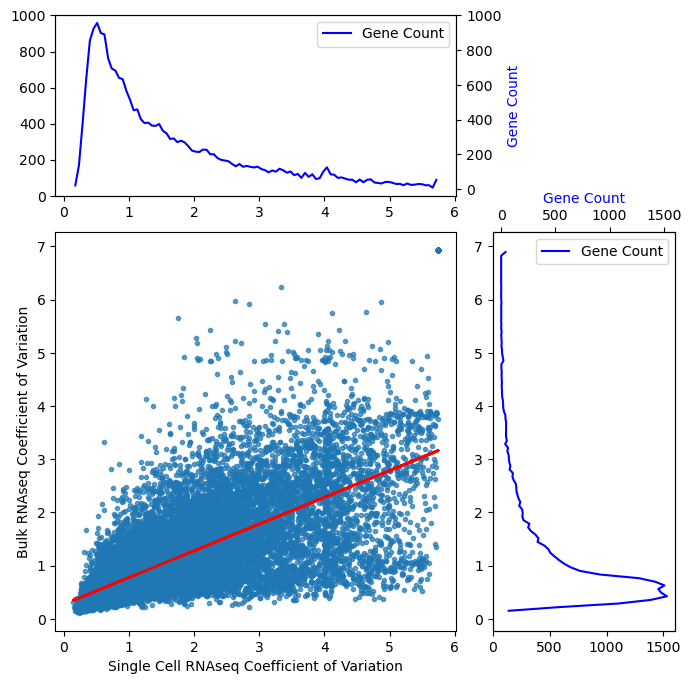

In [20]:
# This would normally be done with the actual 'combined_cv' DataFrame
max_x_cv_points = combined_cv[combined_cv['single_cell_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['single_cell_cv'].max() * 100)]
max_y_cv_points = combined_cv[combined_cv['bulk_cv'].apply(lambda x: int(x * 100)) == int(combined_cv['bulk_cv'].max() * 100)]

# Combine and deduplicate the points
max_cv_points = pd.concat([max_x_cv_points, max_y_cv_points]).drop_duplicates()

# Remove identified points
filtered_cv_points = combined_cv[~combined_cv.index.isin(max_cv_points.index)]

# Assuming filtered_cv_points is your DataFrame
x = filtered_cv_points['single_cell_cv'].values
y = filtered_cv_points['bulk_cv'].values

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x, y, marker='.', alpha=0.7)
ax_main.set(xlabel="Single Cell RNAseq Coefficient of Variation", ylabel="Bulk RNAseq Coefficient of Variation")

line_color = 'blue'

# Linear regression
m, b = np.polyfit(x, y, 1)
ax_main.plot(x, m*x + b, color='red', linewidth=2)  # red color for visibility

# Plot line for x with count of genes
counts_x, edges_x, _ = ax_xDist.hist(x, bins=100, align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_x = 0.5 * (edges_x[:-1] + edges_x[1:])
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.plot(bin_centers_x, counts_x, color=line_color, label='Gene Count')

# Plot line for y with count of genes
counts_y, edges_y, _ = ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='white', edgecolor=line_color, alpha=0)
bin_centers_y = 0.5 * (edges_y[:-1] + edges_y[1:])
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.plot(counts_y, bin_centers_y, color=line_color, label='Gene Count')

# Set labels for the twin axes
ax_xCumDist.set_ylabel('Gene Count', color=line_color)
ax_yCumDist.set_xlabel('Gene Count', color=line_color)

# Show legends
ax_xCumDist.legend()
ax_yCumDist.legend()

jpg_path = 'Fig_6_VariationPlot.jpg'
plt.savefig(jpg_path, format='jpg', dpi=600)

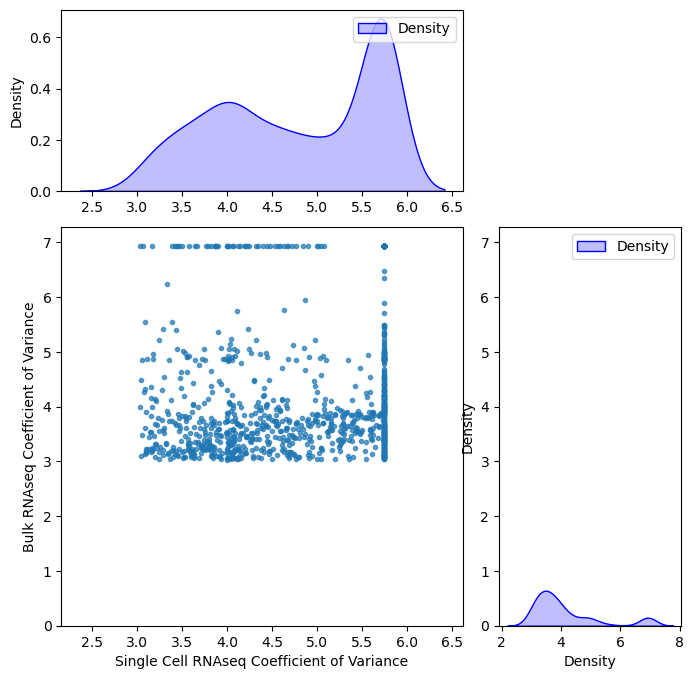

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Assuming top_common_genes is your DataFrame
x = top_common_genes['single_cell_cv'].values
y = top_common_genes['bulk_cv'].values

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(x, y, marker='.', alpha=0.7)
ax_main.set(xlabel="Single Cell RNAseq Coefficient of Variance", ylabel="Bulk RNAseq Coefficient of Variance")

hist_color = 'blue'

# Plot KDE for x with common_norm=True and common_grid=False
sns.kdeplot(x, ax=ax_xDist, color=hist_color, label='Density', fill=True, common_norm=True, common_grid=False)
ax_xDist.legend()
ax_xDist.set(ylabel='Density')

# Plot KDE for y with common_norm=True and common_grid=False
sns.kdeplot(y, ax=ax_yDist, color=hist_color, label='Density', fill=True, common_norm=True, common_grid=False)
ax_yDist.legend()
ax_yDist.set(xlabel='Density')

plt.show()